In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [14]:
df = pd.read_csv('SeoulBikeData.csv', encoding='unicode_escape')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


## Null Value Check

In [15]:
## Check for Null Values 
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [16]:
df.head(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes


## Encoding

In [17]:
## Converting categorical data to numerical values  (Encoding)
cat_col =['Seasons','Holiday','Functioning Day']
from sklearn.preprocessing import LabelEncoder

mapping_d = {}
for col in cat_col:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    
    d = dict(zip(le.classes_, sorted(df[col].unique())))
    mapping_d.update(d)
    
df.head()


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1


In [18]:
d

{'No': 0, 'Yes': 1}

In [19]:
mapping_d

{'Autumn': 0,
 'Spring': 1,
 'Summer': 2,
 'Winter': 3,
 'Holiday': 0,
 'No Holiday': 1,
 'No': 0,
 'Yes': 1}

## Outlier Detection and Handling

In [20]:
df.shape

(8760, 14)

In [21]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

<Axes: >

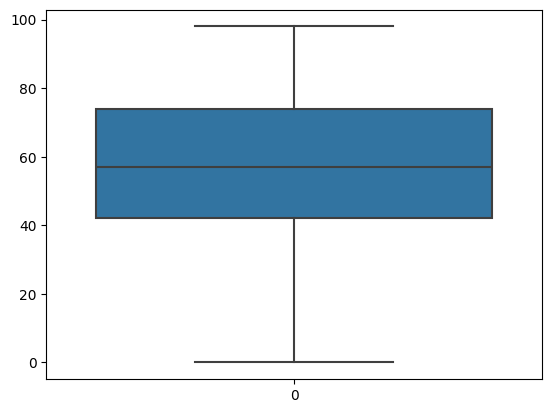

In [25]:
sns.boxplot(df['Humidity(%)'])

In [27]:
stats_df = df.describe()
stats_df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,1.495890,0.950685,0.966324
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,1.114408,0.216537,0.180404
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,2.000000,1.000000,1.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,3.000000,1.000000,1.000000


In [28]:
stats_df[stats_df.index.isin(['min','mean','max'])]

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
mean,704.602055,11.5,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,1.49589,0.950685,0.966324
min,0.000000,0.0,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,3556.000000,23.0,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,3.00000,1.000000,1.000000


<Axes: >

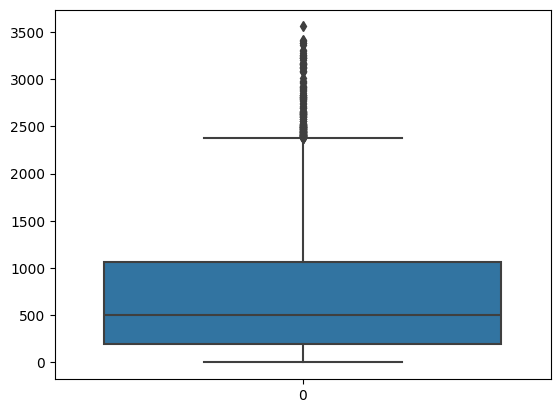

In [32]:
sns.boxplot(df['Rented Bike Count'])

In [33]:
def get_outliers(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    ll = q1 - (1.5*iqr)
    ul = q3 + (1.5 * iqr)
    
    total_rows = df.shape[0]
    filter_rows = df[(df[col]<ll) | (df[col]>ul)].shape[0]
    
    data_loss_percent = (filter_rows/ total_rows)*100
    print(data_loss_percent)

In [34]:
get_outliers(df,'Rented Bike Count')

1.8036529680365299


In [36]:
num_col = ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
for col in num_col:
    print(col)
    get_outliers(df,col)
    print('-------------')

Rented Bike Count
1.8036529680365299
-------------
Hour
0.0
-------------
Temperature(°C)
0.0
-------------
Humidity(%)
0.0
-------------
Wind speed (m/s)
1.8378995433789953
-------------
Visibility (10m)
0.0
-------------
Dew point temperature(°C)
0.0
-------------
Solar Radiation (MJ/m2)
7.317351598173516
-------------
Rainfall(mm)
6.027397260273973
-------------
Snowfall (cm)
5.057077625570776
-------------


In [37]:
df['Solar Radiation (MJ/m2)'].min(),df['Solar Radiation (MJ/m2)'].max()

(0.0, 3.52)

In [38]:
df.shape

(8760, 14)

<Axes: >

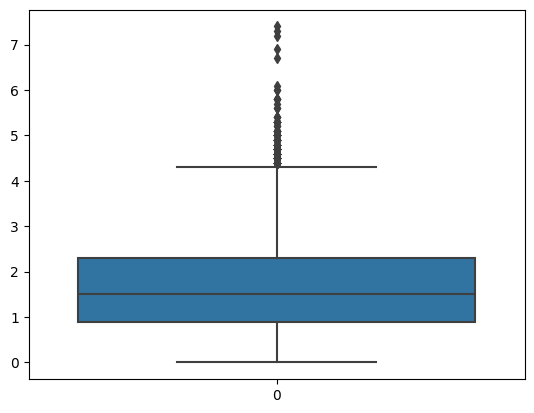

In [47]:
sns.boxplot(df['Wind speed (m/s)'])

In [46]:
def remove_outliers(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    ll = q1 - (1.5*iqr)
    ul = q3 + (1.5 * iqr)
    
    total_rows = df.shape[0]
    filter_rows = df[(df[col]<ll) | (df[col]>ul)].shape[0]
    
    df = df[(df[col]>=ll) & (df[col]<=ul)]
    return df 


In [48]:
cols = ['Rented Bike Count','Wind speed (m/s)','Rainfall(mm)','Snowfall (cm)']
for col in cols:
    print(col)
    print(df.shape)
    df = remove_outliers(df,col)
    df.reset_index(drop=True,inplace=True)
    print(df.shape)
    print('-------------')

Rented Bike Count
(8760, 14)
(8602, 14)
-------------
Wind speed (m/s)
(8602, 14)
(8441, 14)
-------------
Rainfall(mm)
(8441, 14)
(7929, 14)
-------------
Snowfall (cm)
(7929, 14)
(7531, 14)
-------------


## Feature Engineering

In [54]:
df.head(2)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1


In [56]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7531 entries, 0 to 7530
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       7531 non-null   datetime64[ns]
 1   Rented Bike Count          7531 non-null   int64         
 2   Hour                       7531 non-null   int64         
 3   Temperature(°C)            7531 non-null   float64       
 4   Humidity(%)                7531 non-null   int64         
 5   Wind speed (m/s)           7531 non-null   float64       
 6   Visibility (10m)           7531 non-null   int64         
 7   Dew point temperature(°C)  7531 non-null   float64       
 8   Solar Radiation (MJ/m2)    7531 non-null   float64       
 9   Rainfall(mm)               7531 non-null   float64       
 10  Snowfall (cm)              7531 non-null   float64       
 11  Seasons                    7531 non-null   int32         
 12  Holida

C:\Users\Hp\AppData\Local\Temp\ipykernel_2272\2345423161.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [57]:
df.head(2)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1


In [58]:
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['dayofweek'] = df['Date'].dt.dayofweek

In [59]:
df.head(4)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,year,dayofweek
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1,1,2017,3
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1,1,2017,3
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1,1,2017,3
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1,1,2017,3


In [60]:
df['is_weekend'] = np.where(df['dayofweek']<5,0,1)
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,year,dayofweek,is_weekend
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1,1,2017,3,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1,1,2017,3,0
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1,1,2017,3,0
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1,1,2017,3,0
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1,1,2017,3,0


In [61]:
df.drop(['Date'],axis=1,inplace=True)
df.head(3)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,year,dayofweek,is_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1,1,2017,3,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1,1,2017,3,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1,1,2017,3,0


## Standardisation

In [62]:
X = df.iloc[:,1:]
Y = df['Rented Bike Count']
X.head(3)

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,year,dayofweek,is_weekend
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1,1,2017,3,0
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1,1,2017,3,0
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1,1,2017,3,0


In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
ss = StandardScaler()
X_ft = ss.fit_transform(X)
X_ft = pd.DataFrame(X_ft)
X_ft.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.639242,-1.599579,-1.022799,0.574629,0.897796,-1.720171,-0.671515,0.0,0.0,1.405645,0.229239,0.195045,-1.63117,-3.559196,-0.032295,-0.65977
1,-1.495562,-1.625317,-0.969886,-0.913994,0.897796,-1.720171,-0.671515,0.0,0.0,1.405645,0.229239,0.195045,-1.63117,-3.559196,-0.032295,-0.65977
2,-1.351882,-1.668215,-0.916972,-0.701333,0.897796,-1.728065,-0.671515,0.0,0.0,1.405645,0.229239,0.195045,-1.63117,-3.559196,-0.032295,-0.65977


In [65]:
X_ft.columns = X.columns
X_ft.head(3)

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,year,dayofweek,is_weekend
0,-1.639242,-1.599579,-1.022799,0.574629,0.897796,-1.720171,-0.671515,0.0,0.0,1.405645,0.229239,0.195045,-1.63117,-3.559196,-0.032295,-0.65977
1,-1.495562,-1.625317,-0.969886,-0.913994,0.897796,-1.720171,-0.671515,0.0,0.0,1.405645,0.229239,0.195045,-1.63117,-3.559196,-0.032295,-0.65977
2,-1.351882,-1.668215,-0.916972,-0.701333,0.897796,-1.728065,-0.671515,0.0,0.0,1.405645,0.229239,0.195045,-1.63117,-3.559196,-0.032295,-0.65977


## Correlation Check

<Axes: >

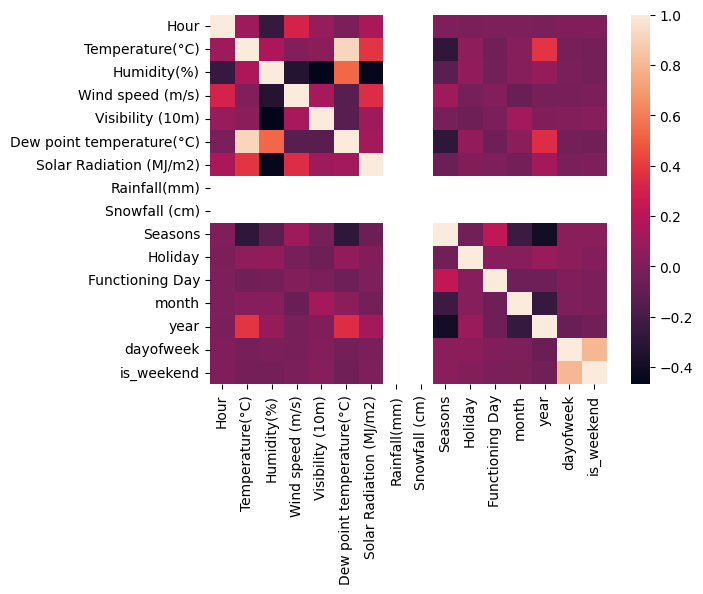

In [66]:
corr_mat = X_ft.corr()
sns.heatmap(corr_mat)

In [68]:
df['Snowfall (cm)'].unique()

array([0.])

In [69]:
corr_mat

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,year,dayofweek,is_weekend
Hour,1.000000,0.113313,-0.259640,0.307447,0.087493,-0.010417,0.145265,NaN,NaN,0.005306,-0.007203,-0.002957,0.000303,-0.015140,0.002771,0.002694
Temperature(°C),0.113313,1.000000,0.159652,0.016155,0.048571,0.914387,0.379049,NaN,NaN,-0.285964,0.053847,-0.044222,0.029854,0.375932,-0.026973,-0.030635
Humidity(%),-0.259640,0.159652,1.000000,-0.328041,-0.469162,0.533042,-0.451703,NaN,NaN,-0.124491,0.066099,-0.035114,0.025781,0.077992,-0.012511,-0.029542
Wind speed (m/s),0.307447,0.016155,-0.328041,1.000000,0.139251,-0.126628,0.346760,NaN,NaN,0.107539,-0.025670,0.014911,-0.072778,-0.025034,-0.019391,-0.010192
Visibility (10m),0.087493,0.048571,-0.469162,0.139251,1.000000,-0.134831,0.108131,NaN,NaN,-0.023967,-0.060203,-0.015438,0.131535,0.008717,0.021810,0.025868
Dew point temperature(°C),-0.010417,0.914387,0.533042,-0.126628,-0.134831,1.000000,0.124319,NaN,NaN,-0.287931,0.070117,-0.052751,0.040891,0.349659,-0.034663,-0.042658
Solar Radiation (MJ/m2),0.145265,0.379049,-0.451703,0.346760,0.108131,0.124319,1.000000,NaN,NaN,-0.063640,0.009593,0.001139,-0.030926,0.125791,-0.010751,-0.003376
Rainfall(mm),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Snowfall (cm),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seasons,0.005306,-0.285964,-0.124491,0.107539,-0.023967,-0.287931,-0.063640,NaN,NaN,1.000000,-0.043992,0.225883,-0.237055,-0.394933,0.041524,0.036708


In [74]:
X_ft.drop(columns=['Rainfall(mm)','Snowfall (cm)','Dew point temperature(°C)'],axis=1,inplace=True)
# X_ft.drop(columns=['Snowfall (cm)'],axis=1,inplace=True)
X_ft.head(4)

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Seasons,Holiday,Functioning Day,month,year,dayofweek,is_weekend
0,-1.639242,-1.599579,-1.022799,0.574629,0.897796,-0.671515,1.405645,0.229239,0.195045,-1.63117,-3.559196,-0.032295,-0.65977
1,-1.495562,-1.625317,-0.969886,-0.913994,0.897796,-0.671515,1.405645,0.229239,0.195045,-1.63117,-3.559196,-0.032295,-0.65977
2,-1.351882,-1.668215,-0.916972,-0.701333,0.897796,-0.671515,1.405645,0.229239,0.195045,-1.63117,-3.559196,-0.032295,-0.65977
3,-1.208202,-1.685375,-0.864058,-0.807664,0.897796,-0.671515,1.405645,0.229239,0.195045,-1.63117,-3.559196,-0.032295,-0.65977


## Feature Selection

### 1. Filter Method

In [75]:
from sklearn.feature_selection import SelectKBest, f_regression

In [76]:
selector = SelectKBest(score_func=f_regression,k = 'all')
selector.fit(X_ft, Y)


SelectKBest(k='all', score_func=<function f_regression at 0x0000025A987896C0>)

In [77]:
feature_scores = pd.DataFrame({'Feature':X_ft.columns , 'Score':selector.scores_
})

In [79]:
feature_scores.sort_values(by='Score')

,Feature,Score
11,dayofweek,10.381602
12,is_weekend,18.099722
7,Holiday,40.563171
9,month,41.256499
2,Humidity(%),109.178361
4,Visibility (10m),150.152658
3,Wind speed (m/s),160.485479
10,year,374.080866
8,Functioning Day,460.055253
6,Seasons,532.195563


### 2. Wrapper Method ( Recursive Feature Elimination)


In [80]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [88]:
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=7)
rfe.fit(X_ft,Y)

RFE(estimator=LinearRegression(), n_features_to_select=7)

In [89]:
rfe_ranking = pd.DataFrame({'Features':X_ft.columns, 'ranking':rfe.ranking_})
rfe_ranking.sort_values(by='ranking')

,Features,ranking
0,Hour,1
1,Temperature(°C),1
2,Humidity(%),1
5,Solar Radiation (MJ/m2),1
6,Seasons,1
7,Holiday,1
8,Functioning Day,1
3,Wind speed (m/s),2
9,month,3
12,is_weekend,4


## Train Test Data Split

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_ft.shape

(7531, 13)

In [92]:
xtrain, xtest, ytrain, ytest = train_test_split(X_ft, Y , test_size=0.20, random_state=78)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((6024, 13), (1507, 13), (6024,), (1507,))

In [93]:
0.20*7531

1506.2

In [95]:
X_ft.shape, Y.shape

((7531, 13), (7531,))

## Model Training

In [96]:
from sklearn.linear_model import LinearRegression

In [97]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)


LinearRegression()

In [102]:
lr_pred = lr.predict(xtest)
lr_pred[:5]

array([1188.88249141,  965.69036596, 1427.6583604 , 1113.59375777,
       1162.90552542])

In [103]:
lr_pred = np.floor(lr_pred)
lr_pred[:5]

array([1188.,  965., 1427., 1113., 1162.])

In [106]:
from sklearn.ensemble import RandomForestRegressor

In [107]:
rf = RandomForestRegressor()
rf.fit(xtrain, ytrain)

RandomForestRegressor()

In [108]:
rf_pred = rf.predict(xtest)
rf_pred = np.floor(rf_pred)
rf_pred[:5]

array([1213.,  446., 1865., 1261., 1999.])

In [120]:
np.ceil(34.6), np.floor(34.6)

(35.0, 34.0)

## Model Evaluation

In [104]:
from sklearn.metrics import r2_score

In [105]:
## Linear Regression
r2_score(ytest, lr_pred)

0.574830214336788

In [109]:
## RAndom Forest
r2_score(ytest,rf_pred)

0.9033477006275538

## Applying features from Feature selection technique 

In [111]:
feature_scores.sort_values(by='Score',ascending =False)

,Feature,Score
1,Temperature(°C),3325.384968
0,Hour,1681.827403
5,Solar Radiation (MJ/m2),537.363665
6,Seasons,532.195563
8,Functioning Day,460.055253
10,year,374.080866
3,Wind speed (m/s),160.485479
4,Visibility (10m),150.152658
2,Humidity(%),109.178361
9,month,41.256499


In [114]:
feature_scores.sort_values(by='Score',ascending =False)['Feature'].values[:10]

array(['Temperature(°C)', 'Hour', 'Solar Radiation (MJ/m2)', 'Seasons',
       'Functioning Day', 'year', 'Wind speed (m/s)', 'Visibility (10m)',
       'Humidity(%)', 'month'], dtype=object)

In [112]:
xtrain.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Seasons,Holiday,Functioning Day,month,year,dayofweek,is_weekend
4703,0.803318,1.832266,-0.387835,1.425271,0.666810,0.851849,0.501947,0.229239,0.195045,0.136700,0.280962,-1.521359,-0.65977
493,1.521718,-1.153439,0.352957,-0.382343,-0.881142,-0.671515,1.405645,0.229239,0.195045,1.609926,-3.559196,-0.032295,-0.65977
5807,1.234358,0.905668,-0.017439,-1.232984,0.708181,-0.671515,-1.305447,0.229239,0.195045,1.609926,0.280962,1.456769,1.51568
733,0.515958,-0.818834,-1.234454,0.149308,-0.320915,-0.237857,1.405645,0.229239,0.195045,0.431345,0.280962,-0.528650,-0.65977
5570,0.803318,1.386126,-0.758231,-0.382343,0.897796,0.418191,-1.305447,0.229239,0.195045,-1.631170,0.280962,-1.025004,-0.65977


In [113]:
xtest.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Seasons,Holiday,Functioning Day,month,year,dayofweek,is_weekend
2967,1.378038,0.039127,-1.022799,-0.595003,0.468576,-0.671515,-0.401750,0.229239,0.195045,-0.747235,0.280962,0.960414,1.51568
5985,0.084918,0.485267,1.834541,0.361969,0.847807,0.029010,-1.305447,0.229239,0.195045,0.725990,0.280962,0.464059,-0.65977
5416,0.946998,1.471922,-0.070353,0.680960,0.897796,-0.549201,0.501947,0.229239,0.195045,0.431345,0.280962,-0.032295,-0.65977
4374,0.372278,1.171636,-0.811145,-0.276012,0.796094,2.931186,0.501947,0.229239,0.195045,0.431345,0.280962,-1.025004,-0.65977
3983,0.803318,1.042942,0.088389,1.744262,-1.058691,0.062368,0.501947,0.229239,0.195045,-0.157945,0.280962,1.456769,1.51568


In [115]:
xtrain_subset = xtrain[['Temperature(°C)', 'Hour', 'Solar Radiation (MJ/m2)', 'Seasons',
       'Functioning Day', 'year', 'Wind speed (m/s)', 'Visibility (10m)',
       'Humidity(%)', 'month']]
xtest_subset = xtest[['Temperature(°C)', 'Hour', 'Solar Radiation (MJ/m2)', 'Seasons',
       'Functioning Day', 'year', 'Wind speed (m/s)', 'Visibility (10m)',
       'Humidity(%)', 'month']]
xtrain_subset.head(3)

,Temperature(°C),Hour,Solar Radiation (MJ/m2),Seasons,Functioning Day,year,Wind speed (m/s),Visibility (10m),Humidity(%),month
4703,1.832266,0.803318,0.851849,0.501947,0.195045,0.280962,1.425271,0.666810,-0.387835,0.136700
493,-1.153439,1.521718,-0.671515,1.405645,0.195045,-3.559196,-0.382343,-0.881142,0.352957,1.609926
5807,0.905668,1.234358,-0.671515,-1.305447,0.195045,0.280962,-1.232984,0.708181,-0.017439,1.609926


In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [117]:
lr1 = LinearRegression()
lr1.fit(xtrain_subset,ytrain)

lr1_pred = np.ceil(lr1.predict(xtest_subset))
lr1_pred[:5]

array([1209.,  954., 1412., 1096., 1191.])

In [118]:
rf1 = RandomForestRegressor()
rf1.fit(xtrain_subset,ytrain)


rf1_pred = np.ceil(rf1.predict(xtest_subset))
rf1_pred[:5]

array([1296.,  471., 1993., 1389., 2092.])

In [121]:
r2_score(ytest, lr1_pred)

0.5721382476891158

In [122]:
r2_score(ytest,rf1_pred)

0.8813808732424738